In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [126]:
df=pd.read_csv("/content/-Airbnb_Open_Data.csv", low_memory=False)

In [127]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [129]:
df.shape

(102599, 26)

In [130]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [131]:
#  neighbourhood group was brookln instead of brooklyn
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,06/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [132]:
# drop duplicate records
df.drop_duplicates(inplace=True)

In [133]:
df.duplicated().value_counts()

,count
False,102058


In [134]:
df.drop(['house_rules','license'], axis=1, inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_policy  

In [136]:
#  removing all the dollar sign from price and service fee column
df['price'] = df['price'].astype(str).str.replace('$','', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$','', regex=False)

In [137]:
# remove all the comma  from price and service fee column
df['price']=df['price'].astype(str).str.replace(',','',regex=False)
df['service fee']=df['service fee'].astype(str).str.replace(',','', regex=False)

In [138]:
#  renaming the price and service fee column
df.rename(columns= {
    'price':'price_$',
    'service fee': 'service_fee_$'

},inplace=True)

In [139]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368.0,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


In [140]:
#  dropping the null values
df.dropna(inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83819 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83819 non-null  int64  
 1   NAME                            83819 non-null  object 
 2   host id                         83819 non-null  int64  
 3   host_identity_verified          83819 non-null  object 
 4   host name                       83819 non-null  object 
 5   neighbourhood group             83819 non-null  object 
 6   neighbourhood                   83819 non-null  object 
 7   lat                             83819 non-null  float64
 8   long                            83819 non-null  float64
 9   country                         83819 non-null  object 
 10  country code                    83819 non-null  object 
 11  instant_bookable                83819 non-null  object 
 12  cancellation_policy             8381

In [142]:
# change all the mismatched data types to the appropiate once
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83819 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83819 non-null  object        
 1   NAME                            83819 non-null  object        
 2   host id                         83819 non-null  object        
 3   host_identity_verified          83819 non-null  object        
 4   host name                       83819 non-null  object        
 5   neighbourhood group             83819 non-null  object        
 6   neighbourhood                   83819 non-null  object        
 7   lat                             83819 non-null  float64       
 8   long                            83819 non-null  float64       
 9   country                         83819 non-null  object        
 10  country code                    83819 non-null  object        
 11  instan

In [144]:
# correct the spelling brookln to brooklyn
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group'] = 'Brooklyn'

In [145]:
df.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,2005,1018.0,204.0,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,2015,291.0,58.0,2.0,118.0,2017-07-21,0.99,5.0,1.0,375.0
10,1006859,Cute & Cozy Lower East Side 1 bdrm,1280143094,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,United States,...,2004,319.0,64.0,1.0,160.0,2019-06-09,1.33,3.0,4.0,1.0
11,1007411,Beautiful 1br on Upper West Side,18824631834,verified,Alan,Manhattan,Upper West Side,40.80316,-73.96545,United States,...,2008,606.0,121.0,5.0,53.0,2019-06-22,0.43,4.0,1.0,163.0
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,Brooklyn,South Slope,40.66829,-73.98779,United States,...,2010,580.0,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0


In [146]:
# get rid of outlier avalability on 365 column data
df=df.drop(df[df['availability 365']> 500].index)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83818 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83818 non-null  object        
 1   NAME                            83818 non-null  object        
 2   host id                         83818 non-null  object        
 3   host_identity_verified          83818 non-null  object        
 4   host name                       83818 non-null  object        
 5   neighbourhood group             83818 non-null  object        
 6   neighbourhood                   83818 non-null  object        
 7   lat                             83818 non-null  float64       
 8   long                            83818 non-null  float64       
 9   country                         83818 non-null  object        
 10  country code                    83818 non-null  object        
 11  instan

Going for EDA (Exploratory Data Analysis)

Summary Statics

In [148]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83818.000000,83818.000000,83818.000000,83618.000000,83589.000000,83818.000000,83818.000000,83818,83818.000000,83818.000000,83818.000000,83818.000000
mean,40.727357,-73.948500,2012.490217,626.345476,125.233033,7.436028,32.241893,2019-06-09 15:43:35.924980224,1.375827,3.278902,7.049691,141.755411
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,2007.000000,341.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721330,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930800,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056315,0.050343,5.760865,331.793162,66.354589,28.119584,51.901397,NaN,1.749397,1.283646,29.564849,133.399179


In [149]:
#  what are the different property types in the Dataset?
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44369
Private room,37684
Shared room,1655
Hotel room,110


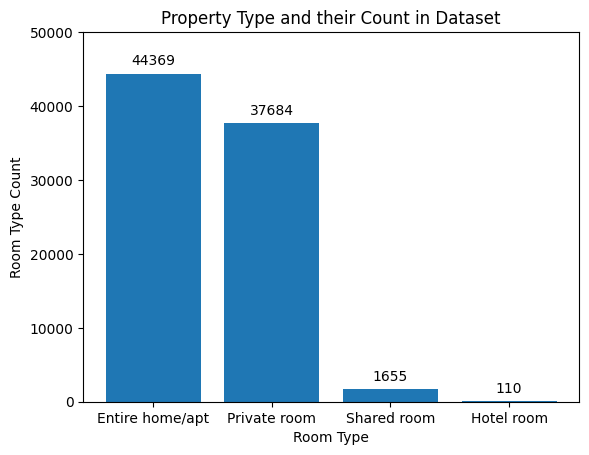

In [150]:
#  room type count plotted on a bar chart
room_type_bar=plt.bar(property_types.index,property_types.loc[:,'count']);
plt.bar_label(room_type_bar,labels=property_types.loc[:,'count'],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Type and their Count in Dataset');

In [151]:
#  which neighbourhood group has the highest number of listing
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34794
Manhattan,34741
Queens,11186
Bronx,2276
Staten Island,821


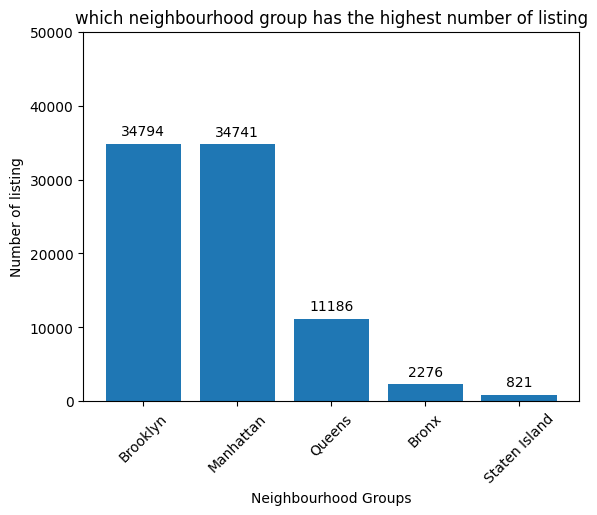

In [152]:
# which neighbourhood group has the highest number of listing ?
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,'count'],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of listing');
plt.xticks(rotation=45);
plt.title('which neighbourhood group has the highest number of listing');

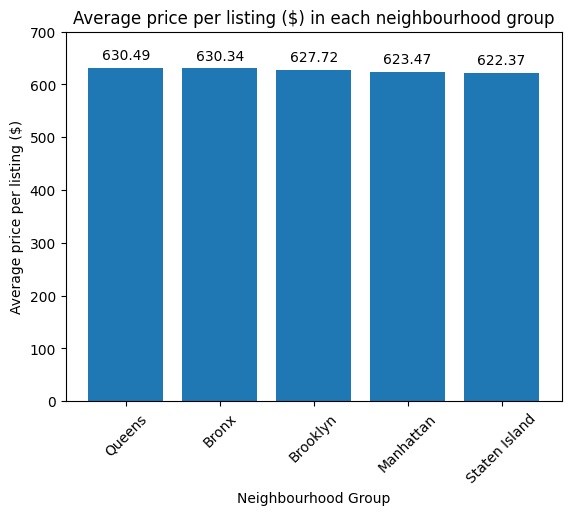

In [153]:
#  which neighbourhood group has the highest average prices for Airbnb listing ?
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,'price_$'],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average price per listing ($)');
plt.xticks(rotation=45);
plt.title('Average price per listing ($) in each neighbourhood group');


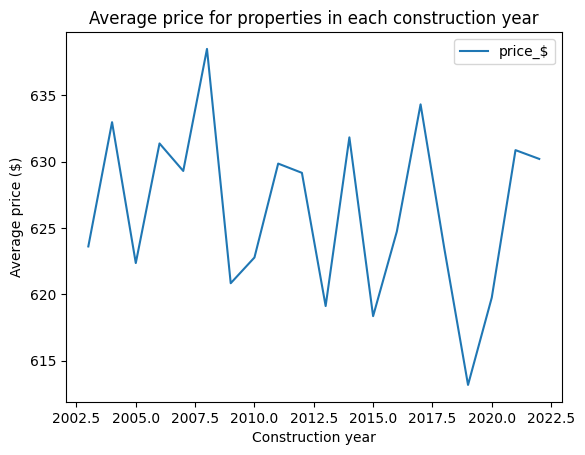

In [154]:
#  is there a relationship between construction year of property and price
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction year');
plt.ylabel('Average price ($)');
plt.title('Average price for properties in each construction year');

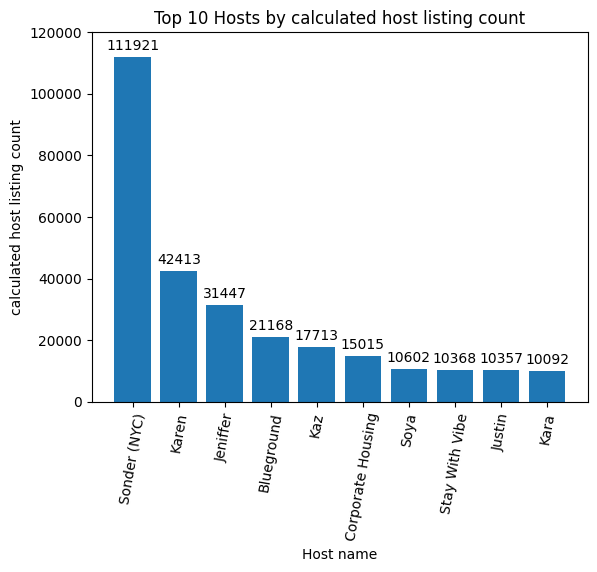

In [155]:
#  who are the top 10 host by calculated host listing count
hosts= df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending =False).nlargest(10).to_frame()
host_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(host_bar,label = hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3);
plt.xlabel('Host name');
plt.ylabel('calculated host listing count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by calculated host listing count');

In [156]:
# Are hosts with verified identities more likely to recieve positive reviews ?
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283975
unconfirmed,3.273831


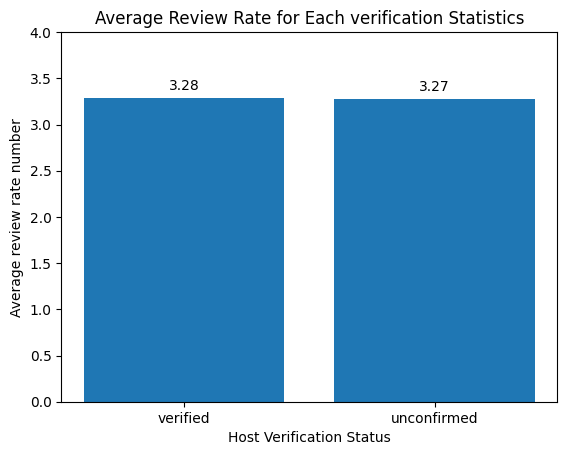

In [157]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average review rate number');
plt.title('Average Review Rate for Each verification Statistics');

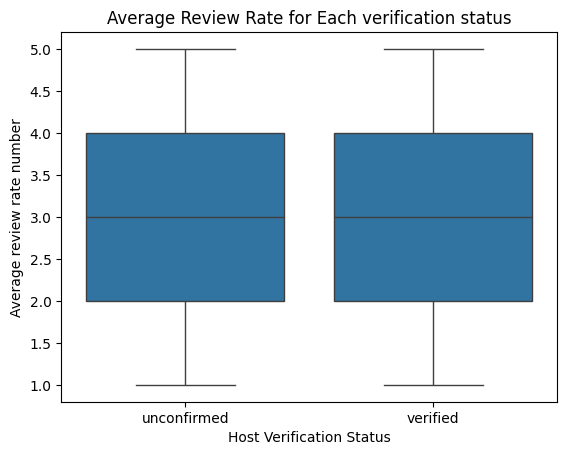

In [158]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df,x='host_identity_verified',y='review rate number',color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Average review rate number');
plt.title('Average Review Rate for Each verification status');

In [159]:
#  is there a corelation between the price of listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909074778258)

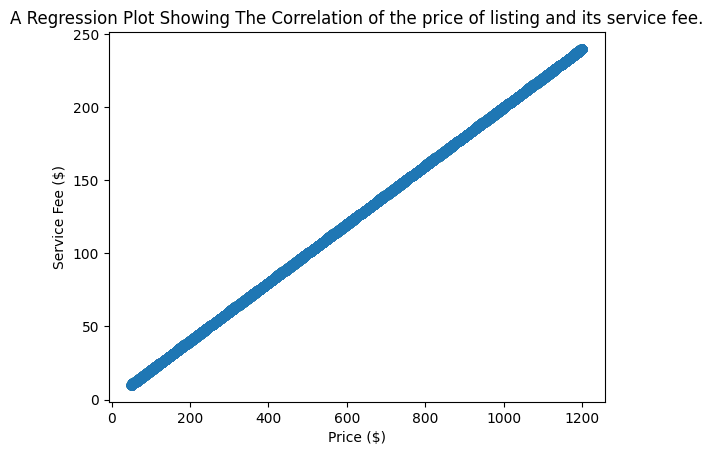

In [160]:
sns.regplot(df, x='price_$',y='service_fee_$');
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot Showing The Correlation of the price of listing and its service fee.');

In [161]:
# what is the average review rate number(eg, Stars) for listing  , and does it very based on the neighbourhood group and room type ?
arnn=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
arnn

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285801
                    Shared room                3.252976
Queens              Entire home/apt            3.347953
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

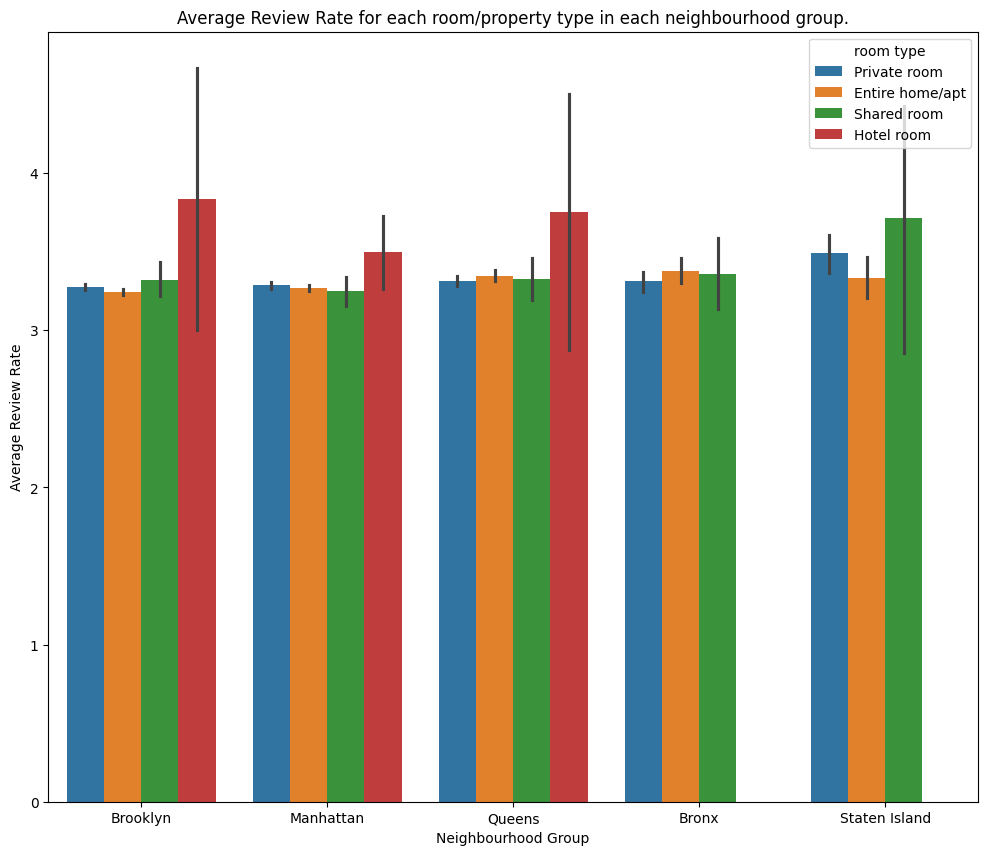

In [162]:
plt.figure(figsize=[12,10]);
sns.barplot(data = df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each room/property type in each neighbourhood group.');

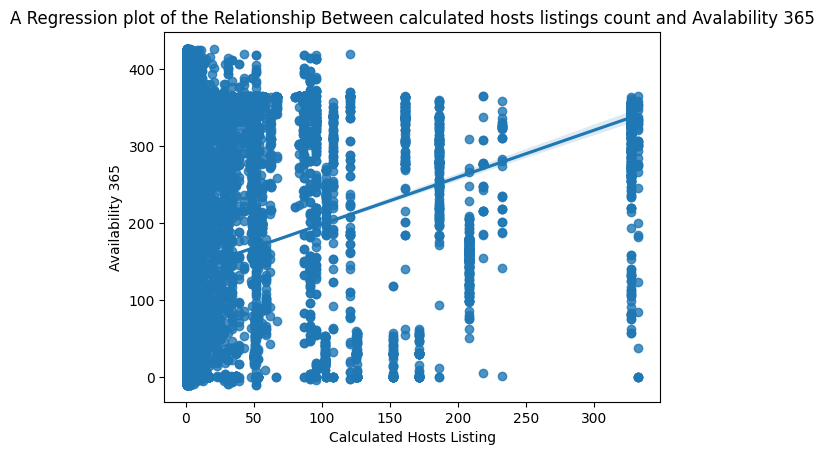

In [163]:
#  are hosts with the higher calculated host listing count more likely to maintain higher avalability throughout the year?
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Hosts Listing');
plt.ylabel('Availability 365');
plt.title('A Regression plot of the Relationship Between calculated hosts listings count and Avalability 365');


In [164]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13532575707935524)